<a href="https://colab.research.google.com/github/RedRex99/CIS351/blob/Master/378hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Homework 2 - SVM Classification



_____________________________________________________

**Homework 2.1 - EMNIST LETTERS CLASSIFICATION**

_____________________________________________________

2.1.1:


Load in the dataset (both training and test sets) so that each sample (e.g. image) is one row. Each row should be of length 784 (each image is  28×28 , so if you view each pixel as a feature you would have  28×28  features for each image.





_____________________________________________________

In [ ]:
!pip install emnist
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install pyflann-py3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 29.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 86.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyflann-py3: filename=pyflann_py3-0.1.0-py3-none-any.whl size=7186986 sha256=c075455211f59320f3176ec696dbe907e304bcda1feeec12d5a9fd19d5ce19d2
  Stored in directory: /root/.cache/pip/wheels/e2/b0/20/359f221881eda4fdb74c10c768abc0a5b1b03e34e15b152138
Successfully built pyflann-py3


In [ ]:
import emnist; emnist.ensure_cached_data()

'/root/.cache/emnist/emnist.zip'

In [ ]:
from emnist import list_datasets

In [ ]:
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')

In [ ]:
X_train = images_train.reshape(124800, 784)

from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')

________________________________________________________________________________



>2.1.2

Threshold the data so that any pixel under some cutoff (you can look at the data and determine what seems to be a reasonable cutoff) is a 0 and all values greater than or equal to the cutoff is a 1. This isn't strictly necessary, but with an SVM it does give better results (you can try it yourself both with and without thresholding to verify)



________________________________________________________________________________

Import numpy file

In [ ]:
import numpy as np

Decide reasonable cutoff

In [ ]:
cutoff = 100

Create the thresh variables based upon cutoff

In [ ]:
train_thresh = np.where(images_train < cutoff, 0, 1)
test_thresh = np.where(images_test < cutoff, 0, 1)

Reshape the data to fit the new threshed data

In [ ]:
shaped_train = train_thresh.reshape((train_thresh.shape[0], -1))
shaped_test = test_thresh.reshape((test_thresh.shape[0], -1))

________________________________________________________________________________

2.1.3

Using sklearn's SGDClassifier, build and evaluate a linear SVM model trained with Stochastic Gradient Descent with the  L2 -penalty and hinge loss. Use partial_fit and compute the accuracy on a held-out validation set after each epoch. Plot these validation set accuracies. How well does this do in comparison to the other methods from the previous assignment (or whatever ones you finished in that assignment)?

________________________________________________________________________________

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Split the training data into a training set and a validation set
val_size = 0.1
val_index = int(len(shaped_train) * (1 - val_size))
X_train_val, y_train_val = shaped_train[:val_index], labels_train[:val_index]
X_val, y_val = shaped_train[val_index:], labels_train[val_index:]

In [ ]:
clf = SGDClassifier(loss='hinge', penalty='l2', alpha = 0.0001, max_iter=1000, tol=1e-3, random_state=42)

In [ ]:
epochs = 10
accuracy_history = []
for epoch in range(epochs):
    clf.partial_fit(X_train_val, y_train_val, classes=np.unique(labels_train))
    y_pred_val = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracy_history.append(accuracy)

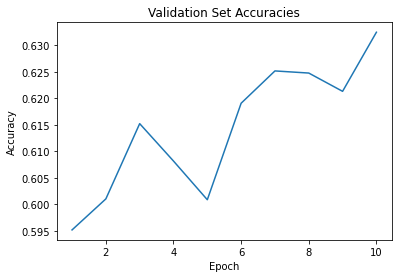

In [ ]:
# Plot the validation set accuracies
plt.plot(range(1, epochs+1), accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Set Accuracies')
plt.show()

_____________________________________________________

**Problem 2.2 - Forest Fire Classification**

_____________________________________________________

**Problem 2.2**

UCI's Machine Learning Repository cotains a dataset of measurements in Algeria for classifying whether or not a given sample is an instance of a forest fire . I've done some slight preprocessing of the dataset to make it a version that is a little easier to work with (primarily fixing a formatting bug in the csv and combining the two regions into one simpler file).



> **2.2.1**

Read in the data and split your data into training, testing sets. The data is still a little messy (there's some extra spaces at the starts and ends of columns), so you will want to make sure that you clean that up prior to splitting the data. Before splitting, it's always good to understand your data and whether the classes are balanced. When classes are unbalanced, it's often best to use stratified sampling (there is an option for this in train_test_split) which makes sure that the relative class frequencies are preserved in the split datasets.



In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving forest-fires-classification.csv to forest-fires-classification.csv


{'forest-fires-classification.csv': b'day,month,year,Temperature, RH, Ws,Rain ,FFMC,DMC,DC,ISI,BUI,FWI,Classes  \r\n1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire   \r\n2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire   \r\n3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire   \r\n4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire   \r\n5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire   \r\n6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire   \r\n7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire   \r\n8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire   \r\n9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire   \r\n10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire   \r\n11,6,2012,31,65,14,0,84.5,12.5,54.3,4,15.8,5.6,fire   \r\n12,6,2012,26,81,19,0,84,13.8,61.4,4.8,17.7,7.1,fire   \r\n13,6,2012,27,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire   \r\n14,6,2012,30,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire   \r\n15,6,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1,not fi

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('forest-fires-classification.csv')

df.columns = df.columns.str.strip()
df['Classes']=df['Classes'].str.strip()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Classes', axis=1), df['Classes'], test_size=0.1, stratify=df['Classes'])



> **2.2.2**

Using sklearn's SGDClassifier, build and train an SVM model (use hinge loss and L2-penalty) to predict whether or not a given sample is a forest fire. By using partial_fit, you can train a model with mini-batch stochastic gradient descent by passing a randomly sample of the data (say by sampling 32 or 64 data points) to partial fit each time. Every so often (maybe every 10 or 20 times you call sample), evaluate your model on both the validation set and the training set and save the accuracies in separate arrays/lists. Given you are using partial_fit, I'd recommend just splitting training into train and validation (but you are welcome to try to use cross-validation as well). Plot both the training and validation accuracies.

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

clf = SGDClassifier(loss='hinge',penalty='l2')

# Find the accuracies from training
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred, )
print(f"Accuracy: {accuracy}")

NameError: ignored

In [ ]:
# Find the accuracies from validation
mini_batch = 64
for i in range(0, X_train.shape[0], mini_batch):
  X_batch = X_train[i:i + mini_batch]
  y_batch = y_train[i:i + mini_batch]
  clf.partial_fit(X_batch, y_batch, classes = np.unique(y_test))

pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.96




> **2.2.3**

Experiment with a variety of values of regularization parameter (alpha parameter) between 1e-8 and 1e-1 and initial learning rate (eta0 parameter) between 1e-8 and 1e-1. (I recommend using the 'invscaling' learning rate schedule, but you are welcome to experiment with that as well). What values to you find work best (and what caused you to determine that)? (Note -- this is called "hyperparameter tuning/optimization")

In [2]:
from sklearn.model_selection import GridSearchCV

# Create arrays of differnt params we could use
param_grid = {
    'alpha': [1e-8, 1e-6, 1e-4, 1e-2, 1e-1],
    'eta0': [1e-8, 1e-6, 1e-4, 1e-2, 1e-1]
}

# Use gridsearchCV to find the best possible params
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the gridsearchCV for best_params and best_score to give params and accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Validation Accuracy: ", grid_search.best_score_)

NameError: ignored



> **2.2.4**

For whatever choices of hyperparameters you determined to be best, retrain your model on the full training set (so both train and validation combined). Then predict on the test set and compute the accuracy of the predictions. Display the results with a confusion matrix. How does it do compare to baseline accuracy for this problem?

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Using the grid_search and GridSearchCV we use best_estimator_ to retrain model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

NameError: ignored

In [ ]:
# Compute and Print validation accuracy
y_pred = best_clf.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print("Validation Accuracy (Final Model): ", val_acc)

Validation Accuracy (Final Model):  0.96


In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[14  0]
 [ 1 10]]


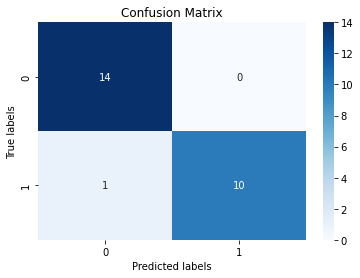

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

_____________________________________________________

**Problem 2.3 - Incorporating New Features**

_____________________________________________________

**Problem 3**

A linear SVM defines a decision boundary that is a hyper plane (meaning in 2D the decision boundary is a straight line).  We can make a linear SVM have the effect of a non-linear decision boundary by feature transformation, adding features based on the original features so that the classes can be separated by a hyperplane in that higher dimensional space.

We'll look at one (artificial) example of this.  Suppose we make some data with the following (there are two classes that are clearly reasonably separable, but not by a straight line in this feature space).

```
from sklearn.datasets import make_circles
pts, labels = make_circles(n_samples = 500, noise = 0.06)
plt.scatter(pts[:,0], pts[:,1], c=labels)
plt.show()
```
 
There are 500 points, each with two features (we'll call them $x_1$ and $x_2$ for a given sample $\mathbf{x}$).  So, we could go all the way up to a feature space of size 5 by adding all of the higher order terms of degree two for these features (aka, $x_1^2$, $x_1 x_2$, and $x_2^2$).  Recall that the formula for a circle centered at the origin is $x^2 + y^2 = r^2$.  So, in a feature space based on just $x_1^2$ and $x_2^2$, the classes should be reasonably separable by a linear decision boundary.

To show this:

_____________________________________________________



> **2.3.1**

Start by creating a new 2D array containing the features  x21  and  x22  (note -- usually we might keep the lower order terms, but they aren't necessary for this example and having a 2D feature space makes it much easier to plot).



_____________________________________________________

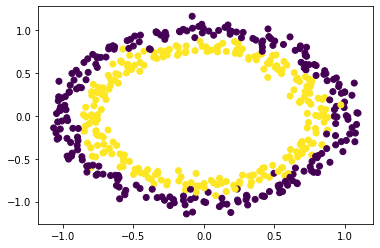

In [ ]:
from sklearn.datasets import make_circles
pts, labels = make_circles(n_samples = 500, noise = 0.06)
plt.scatter(pts[:,0], pts[:,1], c=labels)
plt.show()

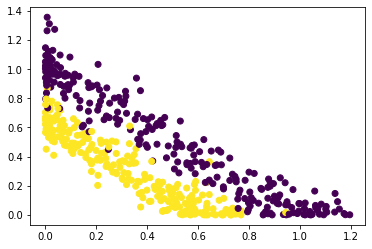

In [ ]:
import numpy as np

x1 = pts[:,0]
x2 = pts[:,1]
x1_sq = np.power(x1, 2)
x2_sq = np .power(x2,2)
x1x2 = x1 * x2
new_feats = np.column_stack((x1_sq, x2_sq))

plt.scatter(new_feats[:,0], new_feats[:,1], c=labels)
plt.show()

_____________________________________________________



> **2.3.2**

Break your newly transformed data into training and test sets using train_test_split. Train a linear SVM (hinge loss, L2 penalty term) on this newly transformed data (the training set). It should do reasonably well with the defaults, but you are free to experiment with hyperparameter optimization if you want.

_____________________________________________________

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(new_feats, labels, test_size=0.2, random_state=42)

In [ ]:
clf = LinearSVC(loss='hinge', penalty='l2', random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge', random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", acc)

Accuracy on test set: 0.95


_____________________________________________________



> **2.3.3**

Use sklearn's DecisionBoundaryDisplay.from_estimator to illustrate the decision boundary and the data points (this is the .scatter(...) part in their example) to visually confirm that they are reasonably separated by the linear decision boundary in the transformed space.

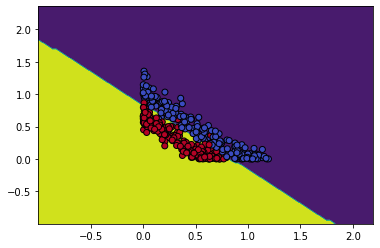

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf, X_train, response_method='predict')

disp.ax_.scatter(X_train[:,0], X_train[:, 1], c=y_train, edgecolor="k", cmap='coolwarm')

_____________________________________________________



> **2.3.4**

Compute the accuracy on the test set.

_____________________________________________________

In [ ]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.95


In [ ]:
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)

0.946236559139785


Note -- the process we went through works, but it doesn't scale well. Instead, there's a well known idea called the "kernel trick" which is more efficient but allows us to accomplish the same thing without explicitly adding all of those features.